In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import functions as F
from afinn import Afinn
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/cristinalawson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
af = Afinn()
sid = SentimentIntensityAnalyzer()

In [15]:
# create Spark session
spark = SparkSession.builder.appName("TwitterSentimentAnalysis").getOrCreate()

In [20]:
def preprocess(df):
    df = df.drop("_c0")
    df = df.drop("_c3")
    df = df.drop("_c4")
    df = df.drop("_c5")
    df = df.drop("_c6")
    df = df.drop("_c7")
    df = df.withColumnRenamed("_c1", "text")
    df = df.withColumnRenamed("_c2", "geo")
    df = df.withColumnRenamed("_c8", "lat")
    df = df.withColumnRenamed("_c9", "long")
    df = df.filter(df.text != "text")

    return df

# text classification
def polarity_detection(list):
    total = 0

    polarity_scores = [sid.polarity_scores(text) for text in list]

    return polarity_scores

def polarity_detection_avg(list):
    total = 0

    polarity_scores = [sid.polarity_scores(text) for text in list]

    for val in polarity_scores:
        total += val
    avg = val/len(polarity_scores)

    return avg

def sentiment_detection(list):
    sentiment_scores = [af.score(text) for text in list]

    return sentiment_scores

def sentiment_detection_avg(list):
    total = 0

    sentiment_scores = [af.score(text) for text in list]

    for val in sentiment_scores:
        total += val
    avg = val/len(sentiment_scores)

    return avg

In [25]:
if __name__ == "__main__":

    # read the tweet data from socket
    # adidas_df = spark.read.csv("Data/Geo Tweets/adidas_geo.csv", multiLine=True)
    # asos_df = spark.read.csv("Data/Geo Tweets/asos_geo.csv", multiLine=True)
    #boohoo_df = spark.read.csv("Data/Geo Tweets/boohoo_geo.csv", multiLine=True)
    # chanel_df = spark.read.csv("Data/Geo Tweets/chanel_geo.csv", multiLine=True)
    # gucci_df = spark.read.csv("Data/Geo Tweets/gucci_geo.csv", multiLine=True)
    # hm_df = spark.read.csv("Data/Geo Tweets/h&m_p.csv", multiLine=True)
    # nike_df = spark.read.csv("Data/Geo Tweets/nike_geo.csv", multiLine=True)
    shein_df = spark.read.csv("Data/Geo Tweets/shein_geo.csv", multiLine=True)
    # victoriassecret_df = spark.read.csv("Data/Geo Tweets/victoriassecret_geo.csv", multiLine=True)
    # zara_df = spark.read.csv("Data/Geo Tweets/zara_geo.csv", multiLine=True)

    # Preprocess the data
    # adidas_df = preprocess(adidas_df)
    # asos_df = preprocess(asos_df)
    #boohoo_df = preprocess(boohoo_df)
    # chanel_df = preprocess(chanel_df)
    # gucci_df = preprocess(gucci_df)
    # hm_df = preprocess(hm_df)
    # nike_df = preprocess(nike_df)
    shein_df = preprocess(shein_df)
    # victoriassecret_df = preprocess(victoriassecret_df)
    # zara_df = preprocess(zara_df)

    # boohoo_df.printSchema()
    # boohoo_df.show()


    # # text classification to define polarity and subjectivity
    # listValues = adidas_df.select("text").rdd.flatMap(lambda x: x).collect()
    # sentiment = sentiment_detection(listValues)
    #
    # listValues = asos_df.select("text").rdd.flatMap(lambda x: x).collect()
    # sentiment = sentiment_detection(listValues)
    #
    # listValues = boohoo_df.select("text").rdd.flatMap(lambda x: x).collect()
    # sentiment = sentiment_detection(listValues)
    #
    # listValues = chanel_df.select("text").rdd.flatMap(lambda x: x).collect()
    # sentiment = sentiment_detection(listValues)
    #
    # listValues = gucci_df.select("text").rdd.flatMap(lambda x: x).collect()
    # sentiment = sentiment_detection(listValues)
    #
    # listValues = hm_df.select("text").rdd.flatMap(lambda x: x).collect()
    # sentiment = sentiment_detection(listValues)
    #
    # listValues = nike_df.select("text").rdd.flatMap(lambda x: x).collect()
    # sentiment = sentiment_detection(listValues)
    #
    listValues = shein_df.select("text").rdd.flatMap(lambda x: x).collect()
    sentiment = sentiment_detection(listValues)
    #
    # listValues = victoriassecret_df.select("text").rdd.flatMap(lambda x: x).collect()
    # sentiment = sentiment_detection(listValues)
    #
    # listValues = zara_df.select("text").rdd.flatMap(lambda x: x).collect()
    # sentiment = sentiment_detection(listValues)

root
 |-- text: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)

+--------------------+--------------------+------------------+--------------------+
|                text|                 geo|               lat|                long|
+--------------------+--------------------+------------------+--------------------+
|@boohoo_cshelp DM...|{'place_id': '56a...|         53.080458|-0.28470473399236246|
|@boohoo still no ...|{'place_id': '05f...|51.845906850000006|  1.2533182983553381|
|@boohoo_cshelp Hi...|{'place_id': '56a...|         53.080458|-0.28470473399236246|
|@boohoo I ordered...|{'place_id': '218...|       53.52626145| -2.4111553778653554|
|Boohoo Boohoo - C...|{'coordinates': {...|      -25.92840703|        133.15429688|
|@grahampphipps @C...|{'place_id': '583...|       33.87322225|   35.90665559346154|
|Boohoo are the DF...|{'place_id': '20b...|        51.5539615| 0.15693844046182445|
|@PlushDrago

In [27]:
df = pd.read_csv('Data/Geo Tweets/shein_geo.csv')
df = df[['text', 'lat', 'long']]
df['sentiment'] = sentiment
df.head()

,text,lat,long,sentiment
0,@boohoo_cshelp DM sent. Thankyou,53.080458,-0.284705,0.0
1,@boohoo still no parcel day 12 what the hell p...,51.845907,1.253318,-5.0
2,@boohoo_cshelp Hi. I ordered on the 2nd Decemb...,53.080458,-0.284705,4.0
3,@boohoo I ordered this jumpsuit and it fit per...,53.526261,-2.411155,4.0
4,Boohoo Boohoo - Coupon Code Christmas Gifts Fl...,-25.928407,133.154297,0.0


<AxesSubplot:>

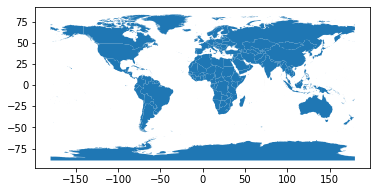

In [33]:
us_map = gpd.read_file('World_Countries__Generalized_.shp')
us_map.crs = "EPSG:4326"
us_map.plot()

In [34]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geo_df = gpd.GeoDataFrame(df, crs = crs,geometry = geometry)

/Users/cristinalawson/PycharmProjects/Assignment3/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 1.0, 'Boohoo Geographical Tweet Sentiment')

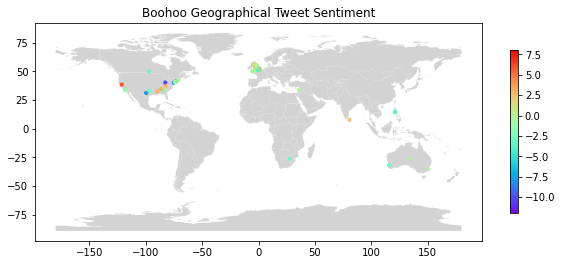

In [35]:
fig, ax = plt.subplots(figsize = (10,10))
us_map.crs = "EPSG:4326"
us_map.plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'sentiment', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3},
            markersize = 10)
ax.set_title('Shein Geographical Tweet Sentiment')